In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import subprocess

# Modeling Report

## Getting data
Here there is a code that:
1. Make json configuration file (config_file.json) in algorithmic way
2. Send it to modeling programm (model.exe)
3. Read modeled data  

After running this code one can get any data needed.  

Example for config_file.json
<pre>
config = {  
    'entries' : [  
        {  
            'model' : 'Euler',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        },  
        {  
            'model' : 'Heun',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        },  
        {  
            'model' : 'RK45',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        }  
    ]  
}
</pre>

In [34]:
config = {'entries' : [], 'files to read': []}
pair_e = []
pair_h = []
pair_rk = []

for i in np.linspace(0.00001,0.00005, 50):
    pair_e.append([i, 50])#4*(i)**-1])
for i in np.linspace(0.00001, 0.00005, 50):
    pair_h.append([i, 50])
for i in np.linspace(0.00001, 0.00005, 50):
    pair_rk.append([i, 50])

for i in range(len(pair_e)):
    config['entries'].append({
        'model' : 'Euler',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_e[i][1],
        'step of modeling' : pair_e[i][0],
        'file name' : 'data/Euler_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_e[i][1]))+'_'+
        str(round(pair_e[i][0],6))+'.txt'
    })
for i in range(len(pair_h)):
    config['entries'].append({
        'model' : 'Heun',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_h[i][1],
        'step of modeling' : pair_h[i][0],
        'file name' : 'data/Heun_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_h[i][1]))+'_'+
        str(round(pair_h[i][0],6))+'.txt'
    })
for i in range(len(pair_rk)):
    config['entries'].append({
        'model' : 'RK45',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_rk[i][1],
        'step of modeling' : pair_rk[i][0],
        'file name' : 'data/RK45_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_rk[i][1]))+'_'+
        str(round(pair_rk[i][0],6))+'.txt'
    })

In [35]:
pair_e = []
pair_h = []
pair_rk = []

for i in np.linspace(0.00001,0.00005, 50):
    pair_e.append([i, 50])#4*(i)**-1])
for i in np.linspace(0.00001, 0.00005, 50):
    pair_h.append([i, 50])
for i in np.linspace(0.00001, 0.00005, 50):
    pair_rk.append([i, 50])

for i in range(len(pair_e)):
    config['files to read'].append({'name':
        'data/Euler_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_e[i][1]))+'_'+
        str(round(pair_e[i][0],6))+'.txt',
        'model' : 'Euler'
    })

for i in range(len(pair_h)):
    config['files to read'].append({'name':
        'data/Heun_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_h[i][1]))+'_'+
        str(round(pair_h[i][0],6))+'.txt',
        'model' : 'Heun'
    })

for i in range(len(pair_rk)):
    config['files to read'].append({'name':
        'data/RK45_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(pair_rk[i][1]))+'_'+
        str(round(pair_rk[i][0],6))+'.txt',
        'model' : 'RK45'
    })

In [36]:
write = open('config_file.json', 'w')
json.dump(config, write, indent=4)
write.close()

In [ ]:
cmd = 'c:/users/coolg/modeling/wk4/model.exe'
returned_output = subprocess.check_output(cmd)
print(returned_output.decode('utf-8'))

## Precision
Using json file I've modeled 50 tries for each method with step of modeling in range ($10^{-5},~~5\cdot10^{-5}$) and  
drawed graph $a(h)$, where $a$ is fit parameter $E^{model}(t) = e^{at} \cdot E^{teory}(t)$.  
In the picture one can see that:
$$a^{Euler} = 4\pm10^{-5},~a^{Heun, RK} = 0 \pm 10^{-5},~(h \rightarrow 0)$$

In [37]:
d_e = []
d_h = []
d_rk = []
count = 0
for i in range(len(config['files to read'])):
    if (config['files to read'][i]['model'] == 'Euler'):
        d_e.append(pd.read_csv(config['files to read'][i]['name']))
    if (config['files to read'][i]['model'] == 'Heun'):
        d_h.append(pd.read_csv(config['files to read'][i]['name']))
    if (config['files to read'][i]['model'] == 'RK45'):
        d_rk.append(pd.read_csv(config['files to read'][i]['name']))
    #print(config['files to read'][i]['name'], 'has been added to dataset')
    count += 1
print(count, 'files were added')
print('Euler: ',len(d_e))
print('Houn:  ',len(d_h))
print('RK45:  ',len(d_rk))

150 files were added
Euler:  50
Houn:   50
RK45:   50


In [38]:
en_e = []
en_h = []
en_rk = []

for i in range(len(d_e)):
    en_e.append((d_e[i].v ** 2 + d_e[i].w[0] ** 2 * d_e[i].x ** 2) / (d_e[i].v[0] ** 2 + d_e[i].w[0] ** 2 * d_e[i].x[0] ** 2))
for i in range(len(d_h)):
    en_h.append((d_h[i].v ** 2 + d_h[i].w[0] ** 2 * d_h[i].x ** 2) / (d_h[i].v[0] ** 2 + d_h[i].w[0] ** 2 * d_h[i].x[0] ** 2))
for i in range(len(d_rk)):
    en_rk.append((d_rk[i].v ** 2 + d_rk[i].w[0] ** 2 * d_rk[i].x ** 2) / (d_rk[i].v[0] ** 2 + d_rk[i].w[0] ** 2 * d_rk[i].x[0] ** 2))

In [55]:
func_e=[0]*len(d_e)
func_h=[0]*len(d_h)
func_rk=[0]*len(d_rk)
err_e=[]#[0]*len(d_e)
err_h=[]#[0]*len(d_h)
err_rk=[]#[0]*len(d_rk)
coeff_e = np.zeros(len(d_e))
step_e = np.zeros(len(d_e))
coeff_h = np.zeros(len(d_h))
step_h = np.zeros(len(d_h))
coeff_rk = np.zeros(len(d_rk))
step_rk = np.zeros(len(d_rk))
a = 0
b = 0

for i in range(len(d_e)):
    t = np.linspace(0, d_e[i].h[0] * d_e[i].L[0], len(d_e[i].x))
    func_e[i], [a, b] = np.polyfit(t, np.log(en_e[i]), deg=1, cov=True)
    err_e.append(0.5 * (np.absolute(a[0]) + np.absolute(a[1])))
for i in range(len(d_h)):
    t = np.linspace(0, d_h[i].h[0] * d_h[i].L[0], len(d_h[i].x))
    func_h[i], [a, b] = np.polyfit(t, np.log(en_h[i]), deg=1, cov=True)
    err_h.append(0.5 * (np.absolute(a[0]) + np.absolute(a[1])))
for i in range(len(d_rk)):
    t = np.linspace(0, d_rk[i].h[0] * d_rk[i].L[0], len(d_rk[i].x))
    func_rk[i], [a, b] = np.polyfit(t, np.log(en_rk[i]), deg=1, cov=True)
    err_rk.append(0.5 * (np.absolute(a[0]) + np.absolute(a[1])))

for i in range(len(d_e)):
    coeff_e[i] = func_e[i][0]
    step_e[i] = d_e[i].h[0]
for i in range(len(d_h)):
    coeff_h[i] = func_h[i][0]
    step_h[i] = d_h[i].h[0]
for i in range(len(d_rk)):
    coeff_rk[i] = func_rk[i][0]
    step_rk[i] = d_rk[i].h[0]

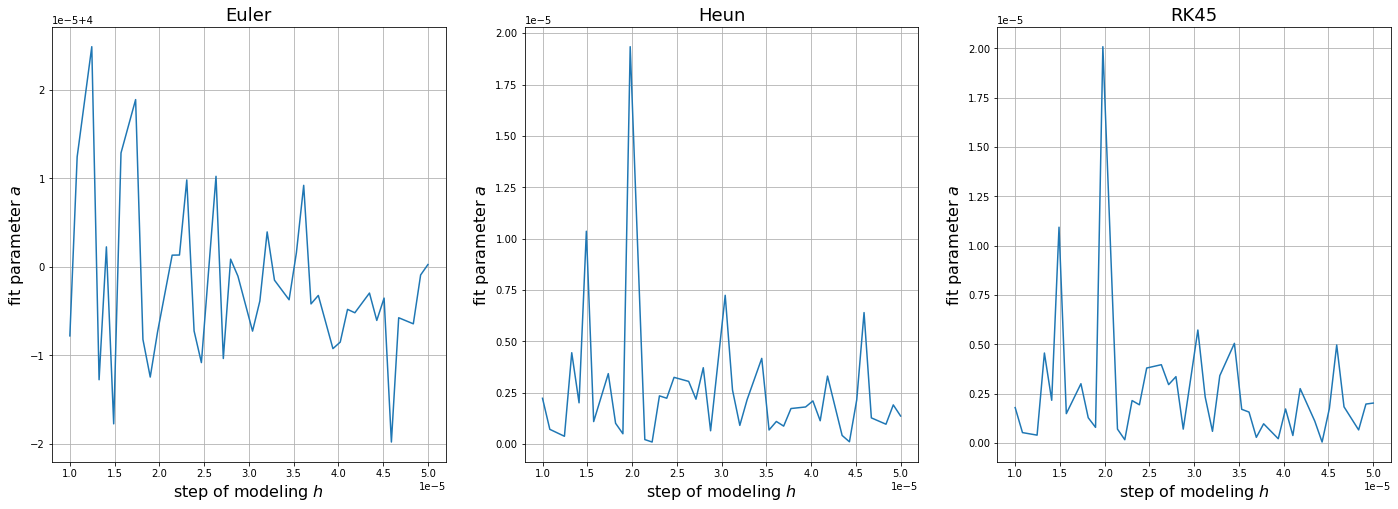

In [69]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(24,8)

ax[0].plot(step_e, np.absolute(coeff_e))
ax[1].plot(step_h, np.absolute(coeff_h))
ax[2].plot(step_rk, np.absolute(coeff_rk))

ax[0].set_title('Euler', fontsize=18)
ax[1].set_title('Heun', fontsize=18)
ax[2].set_title('RK45', fontsize=18)

ax[0].set_xlabel('step of modeling $h$', fontsize=16)
ax[1].set_xlabel('step of modeling $h$', fontsize=16)
ax[2].set_xlabel('step of modeling $h$', fontsize=16)

ax[0].set_ylabel('fit parameter $a$', fontsize=16)
ax[1].set_ylabel('fit parameter $a$', fontsize=16)
ax[2].set_ylabel('fit parameter $a$', fontsize=16)

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
plt.show()